### Data Importing

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [2]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
anime.shape

(12294, 7)

In [4]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
rating.shape

(7813737, 3)

In [6]:
print("Number of unique user:",len(rating.user_id.unique()))

Number of unique user: 73515


In [7]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [8]:
rating['user_id'] = rating['user_id'].astype(object)
rating['anime_id'] = rating['anime_id'].astype(object)

In [9]:
anime['anime_id'] = anime['anime_id'].astype(object)

In [10]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  object 
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 672.5+ KB


### Data Cleaning

In [11]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


##### -1 rating means an user watched this anime but did not leave a rating, we will leave it as it is

In [12]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [13]:
anime.genre.unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [14]:
anime.type.unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [15]:
anime.episodes.unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [16]:
anime.episodes.replace({'Unknown':np.nan},inplace = True)

In [17]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64

##### We observed null values in genre, type, and rating columns, since they are unique for each animes, we will remove them instead of replacing with mean or median.

In [18]:
anime.dropna(inplace=True)

In [19]:
rating.dropna(inplace=True)

In [20]:
anime.shape

(11830, 7)

In [21]:
rating.shape

(7813737, 3)

In [22]:
len(rating.user_id.unique())

73515

In [23]:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

##### Removing special characters from anime name

In [24]:
anime.name[:10]

0                                       Kimi no Na wa.
1                     Fullmetal Alchemist: Brotherhood
2                                             Gintama°
3                                          Steins;Gate
4                                        Gintama&#039;
5    Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
6                               Hunter x Hunter (2011)
7                                 Ginga Eiyuu Densetsu
8    Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...
9                             Gintama&#039;: Enchousen
Name: name, dtype: object

In [25]:
import re
import string

In [26]:
def remove_special_character(name):
    name = "".join([char for char in name if char not in string.punctuation])
    name = re.sub(r'°', '',name)
    name = re.sub(r'&quot;', '', name)
    name = re.sub(r'.hack//', '', name)
    name = re.sub(r'&#039;', '', name)
    name = re.sub(r'A&#039;s', '', name)
    name = re.sub(r'I&#039;', 'I\'', name)
    name = re.sub(r'&amp;', 'and', name)
    return name
anime['name'] = anime['name'].apply(remove_special_character)

In [27]:
anime.name[:20]

0                                         Kimi no Na wa
1                       Fullmetal Alchemist Brotherhood
2                                               Gintama
3                                            SteinsGate
4                                            Gintama039
5     Haikyuu Karasuno Koukou VS Shiratorizawa Gakue...
6                                  Hunter x Hunter 2011
7                                  Ginga Eiyuu Densetsu
8      Gintama Movie Kanketsuhen  Yorozuya yo Eien Nare
9                                  Gintama039 Enchousen
10                                  Clannad After Story
11                                       Koe no Katachi
12                                              Gintama
13                    Code Geass Hangyaku no Lelouch R2
14                                Haikyuu Second Season
15                        Sen to Chihiro no Kamikakushi
16                              Shigatsu wa Kimi no Uso
17                        Mushishi Zoku Shou 2nd

In [28]:
df = pd.merge(anime,rating,how="inner",on='anime_id')

In [29]:
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [30]:
df.rename(columns = {'rating_x':'average_rating'},inplace=True)
df.rename(columns = {'rating_y':'user_rating'},inplace=True)

In [31]:
df

,anime_id,name,genre,type,episodes,average_rating,members,user_id,user_rating
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813602,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,39532,-1
7813603,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,48766,-1
7813604,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,60365,4
7813605,26081,Yasuji no Pornorama Yacchimae,Hentai,Movie,1,5.46,142,27364,-1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813607 entries, 0 to 7813606
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   anime_id        object 
 1   name            object 
 2   genre           object 
 3   type            object 
 4   episodes        object 
 5   average_rating  float64
 6   members         int64  
 7   user_id         object 
 8   user_rating     int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 596.1+ MB


In [33]:
df['episodes'] = df['episodes'].astype(np.int64)
anime['episodes'] = anime['episodes'].astype(np.int64)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813607 entries, 0 to 7813606
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   anime_id        object 
 1   name            object 
 2   genre           object 
 3   type            object 
 4   episodes        int64  
 5   average_rating  float64
 6   members         int64  
 7   user_id         object 
 8   user_rating     int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 596.1+ MB


##### Check for duplicates column with unique key {user_id,anime_id}

In [35]:
print("There are", df.duplicated(subset=['user_id','anime_id']).sum(), "duplicates in this dataset")

There are 7 duplicates in this dataset


In [36]:
df.drop_duplicates(subset=['user_id','anime_id'],inplace=True)

##### reseting index after data cleaning

In [37]:
df.reset_index(drop=True,inplace=True)

In [38]:
df

,anime_id,name,genre,type,episodes,average_rating,members,user_id,user_rating
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813595,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,39532,-1
7813596,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,48766,-1
7813597,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,60365,4
7813598,26081,Yasuji no Pornorama Yacchimae,Hentai,Movie,1,5.46,142,27364,-1


In [39]:
anime.reset_index(drop=True,inplace=True)

In [40]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,SteinsGate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
11825,9316,Toushindai My Lover Minami tai MechaMinami,Hentai,OVA,1,4.15,211
11826,5543,Under World,Hentai,OVA,1,4.28,183
11827,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
11828,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175


In [41]:
df.describe(include=object)

,anime_id,name,genre,type,user_id
count,7813600,7813600,7813600,7813600,7813600
unique,11158,11135,3154,6,73515
top,1535,Death Note,Hentai,TV,48766
freq,39340,39340,62435,5283586,10223


In [42]:
df[df['user_rating'] != -1].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,episodes,average_rating,members,user_rating
count,6337137.00000,6337137.00000,6337137.00000,6337137.00000
mean,18.75274,7.67501,184576.39191,7.80854
std,35.20937,0.66990,190952.79433,1.57244
min,1.00000,2.00000,33.00000,1.00000
25%,3.00000,7.29000,46803.00000,7.00000
50%,12.00000,7.70000,117091.00000,8.00000
75%,24.00000,8.15000,256325.00000,9.00000
max,1818.00000,9.37000,1013917.00000,10.00000


In [43]:
df_corr = df.corr()
df_corr

,episodes,average_rating,members,user_rating
episodes,1.000000,0.160572,0.255437,0.040592
average_rating,0.160572,1.000000,0.542173,0.202095
members,0.255437,0.542173,1.000000,0.141311
user_rating,0.040592,0.202095,0.141311,1.000000


<AxesSubplot:>

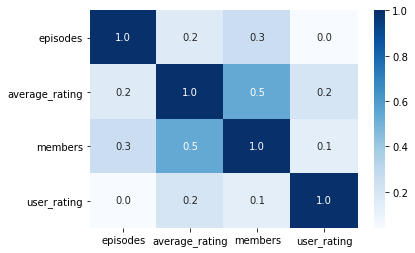

In [44]:
plt.figure()
sns.heatmap(df_corr, cmap='Blues', annot=True, fmt=".1f")

### word cloud for genres

In [45]:
g = df.genre
genre_dic = {}
for item in g:
    for genre in item.split(','):
        if not genre_dic:
            genre_dic[genre] = 0
        else:
            if genre in genre_dic.keys():
                genre_dic[genre] += 1
            else:
                genre_dic[genre] = 0

In [46]:
from wordcloud import WordCloud, ImageColorGenerator
wd = WordCloud(max_font_size=100, max_words=800,
               width=800, height=500,min_font_size=17,
               background_color="white").fit_words(genre_dic)
wd.to_file('wd1.png')

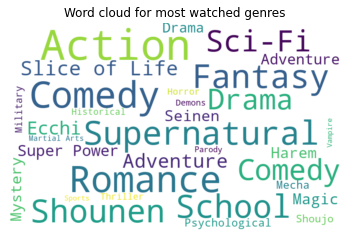

In [47]:
plt.imshow(wd, interpolation='bilinear')
plt.axis("off")
plt.title('Word cloud for most watched genres')
plt.show()

### community size distribution

In [48]:
m = anime.sort_values('members', ascending=False).members

<BarContainer object of 2 artists>

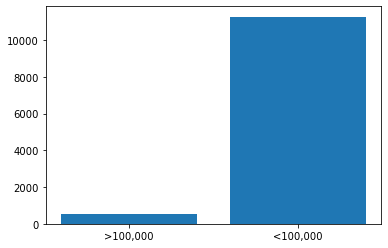

In [49]:
m_df = pd.DataFrame(m/100000)
plt.bar(['>100,000','<100,000'],[len(m_df[m_df.members>=1]),len(m_df)-len(m_df[m_df.members>=1])])

In [50]:
m_df[m_df.members<1].sum()

members    992.38916
dtype: float64

Text(0.5, 1.0, "Distribution of community members(in 100,000's)")

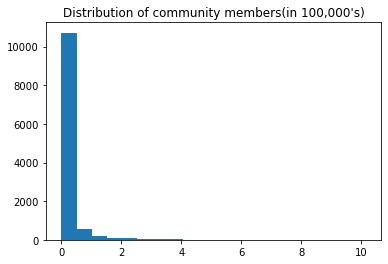

In [51]:
plt.hist(m_df.members,bins=20)
plt.title("Distribution of community members(in 100,000's)")

### top 10 anime by number of users

In [52]:
top_anime_by_user = pd.DataFrame(df.groupby('name').size().sort_values(ascending=False)[:10])
top_anime_by_user.reset_index(inplace=True)
top_anime_by_user.rename(columns={0:'users'}, inplace=True)
top_anime_by_user.index = np.arange(1,11)
top_anime_by_user

,name,users
1,Death Note,39340
2,Sword Art Online,30582
3,Shingeki no Kyojin,29583
4,Code Geass Hangyaku no Lelouch,27717
5,Elfen Lied,27506
6,Angel Beats,27183
7,Naruto,25925
8,KOn,25597
9,Fullmetal Alchemist,25032
10,Fullmetal Alchemist Brotherhood,24574


### top 10 anime by size of community

In [53]:
top_anime_by_member = anime.sort_values('members', ascending=False)[['name','members']][:10]
top_anime_by_member.index = np.arange(1,11)
top_anime_by_member

,name,members
1,Death Note,1013917
2,Shingeki no Kyojin,896229
3,Sword Art Online,893100
4,Fullmetal Alchemist Brotherhood,793665
5,Angel Beats,717796
6,Code Geass Hangyaku no Lelouch,715151
7,Naruto,683297
8,SteinsGate,673572
9,Mirai Nikki TV,657190
10,Toradora,633817


### top 10 anime by average rating

In [54]:
df_new = df.copy()
top_anime_by_rating = df_new.groupby('name', as_index=False).max()[['name','average_rating']] \
.sort_values('average_rating', ascending=False)[:10]
top_anime_by_rating.index = np.arange(1,11)
top_anime_by_rating

,name,average_rating
1,Mogura no Motoro,9.50
2,Kimi no Na wa,9.37
3,Fullmetal Alchemist Brotherhood,9.26
4,Yakusoku Africa Mizu to Midori,9.25
5,Gintama,9.25
6,SteinsGate,9.17
7,Gintama039,9.16
8,Haikyuu Karasuno Koukou VS Shiratorizawa Gakue...,9.15
9,Hunter x Hunter 2011,9.13
10,Gintama039 Enchousen,9.11


Text(0, 0.5, 'Community Size')

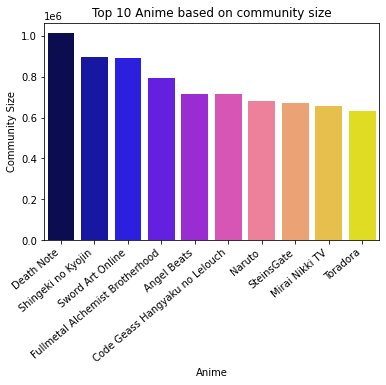

In [89]:
top10_animemembers=anime[['name', 'members']].sort_values(by = 'members',ascending = False).head(10)
sns.barplot(x="name", y="members", data=top10_animemembers, palette="gnuplot2")
plt.xticks(rotation=40, ha="right")
plt.title('Top 10 Anime based on community size')
plt.xlabel('Anime') 
plt.ylabel('Community Size')

In [92]:
anime_rating_count = df.groupby(by = ['name'])['user_rating'].count().reset_index()[['name', 'user_rating']]
anime_rating_count.rename(columns = {'user_rating': 'totalRatingCount'},inplace=True)
anime_rating_count.head()

,name,totalRatingCount
0,0008,43
1,001,12
2,009 ReCyborg,291
3,0091,304
4,0091 RampB,128


Text(0, 0.5, 'User Rating count')

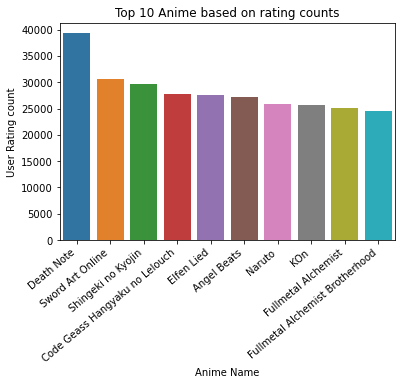

In [97]:
top10_animerating=anime_rating_count[['name', 'totalRatingCount']].sort_values(by = 'totalRatingCount',ascending = False).head(10)
sns.barplot(x="name", y="totalRatingCount", data=top10_animerating)
plt.xticks(rotation=40, ha="right")
plt.title('Top 10 Anime based on rating counts')
plt.xlabel('Anime Name') 
plt.ylabel('User Rating count')

Text(0.5, 1.0, 'User Ratings')

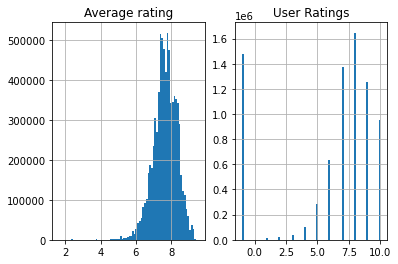

In [108]:
plt.subplot(1,2,1)
df['average_rating'].hist(bins=80)
plt.title("Average rating")
plt.subplot(1,2,2)
df['user_rating'].hist(bins=80)
plt.title("User Ratings")

### Data Preprocessing for clustering

In [55]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,SteinsGate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [56]:
genre = anime['genre'].str.split(',',expand=True)

In [57]:
genre.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Drama,Romance,School,Supernatural,None,None,None,None,None,None,None,None,None
1,Action,Adventure,Drama,Fantasy,Magic,Military,Shounen,None,None,None,None,None,None
2,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
3,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None
4,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None


In [58]:
anime_genre = anime.copy()
anime_genre = pd.concat([anime_genre,genre],axis=1)

In [59]:
anime_genre = anime_genre.drop('genre',axis=1)

In [60]:
anime_genre

,anime_id,name,type,episodes,rating,members,0,1,2,3,4,5,6,7,8,9,10,11,12
0,32281,Kimi no Na wa,Movie,1,9.37,200630,Drama,Romance,School,Supernatural,None,None,None,None,None,None,None,None,None
1,5114,Fullmetal Alchemist Brotherhood,TV,64,9.26,793665,Action,Adventure,Drama,Fantasy,Magic,Military,Shounen,None,None,None,None,None,None
2,28977,Gintama,TV,51,9.25,114262,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
3,9253,SteinsGate,TV,24,9.17,673572,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None
4,9969,Gintama039,TV,51,9.16,151266,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,9316,Toushindai My Lover Minami tai MechaMinami,OVA,1,4.15,211,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
11826,5543,Under World,OVA,1,4.28,183,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
11827,5621,Violence Gekiga David no Hoshi,OVA,4,4.88,219,Hentai,None,None,None,None,None,None,None,None,None,None,None,None
11828,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,OVA,1,4.98,175,Hentai,None,None,None,None,None,None,None,None,None,None,None,None


In [61]:
anime_genre_categorical = anime_genre[['type',0,1,2,3,4,5,6,7,8,9,10,11,12]]

In [62]:
anime_dummies = pd.get_dummies(anime_genre_categorical)

In [63]:
anime_dummies

,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,0_Action,0_Adventure,0_Cars,0_Comedy,...,9_ School,9_ Sci-Fi,9_ Shounen,9_ Space,9_ Super Power,9_ Supernatural,10_ Slice of Life,10_ Supernatural,11_ Super Power,12_ Supernatural
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11826,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11827,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11828,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
anime_genre_numnerical = anime_genre[['episodes','rating','members']]

In [65]:
anime_genre_numnerical

,episodes,rating,members
0,1,9.37,200630
1,64,9.26,793665
2,51,9.25,114262
3,24,9.17,673572
4,51,9.16,151266
...,...,...,...
11825,1,4.15,211
11826,1,4.28,183
11827,4,4.88,219
11828,1,4.98,175


In [66]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
result = ss.fit_transform(anime_genre_numnerical)

In [67]:
anime_genre_numnerical_scaled = pd.DataFrame(result, columns = anime_genre_numnerical.columns)

In [68]:
anime_genre_numnerical_scaled

,episodes,rating,members
0,-0.243905,2.831301,3.289181
1,1.093813,2.723363,13.999758
2,0.817776,2.713551,1.729322
3,0.244468,2.635050,11.830805
4,0.817776,2.625238,2.397637
...,...,...,...
11825,-0.243905,-2.290843,-0.330509
11826,-0.243905,-2.163280,-0.331015
11827,-0.180204,-1.574528,-0.330365
11828,-0.243905,-1.476403,-0.331159


In [69]:
clustering_df = pd.concat([anime_genre_numnerical_scaled,anime_dummies],axis=1)
clustering_df

,episodes,rating,members,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,0_Action,...,9_ School,9_ Sci-Fi,9_ Shounen,9_ Space,9_ Super Power,9_ Supernatural,10_ Slice of Life,10_ Supernatural,11_ Super Power,12_ Supernatural
0,-0.243905,2.831301,3.289181,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.093813,2.723363,13.999758,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0.817776,2.713551,1.729322,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.244468,2.635050,11.830805,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.817776,2.625238,2.397637,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,-0.243905,-2.290843,-0.330509,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11826,-0.243905,-2.163280,-0.331015,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11827,-0.180204,-1.574528,-0.330365,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11828,-0.243905,-1.476403,-0.331159,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Clustering Select K using Silhouette Score

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [71]:
ssd = []
sscore = []
for i in range(2,15):
    find_k = KMeans(n_clusters = i, random_state = 2)
    find_k.fit(clustering_df)
    ssd.append(find_k.inertia_)
    silhouette = silhouette_score(clustering_df,find_k.labels_)
    sscore.append(silhouette)

Text(0, 0.5, 'Silhouette Score')

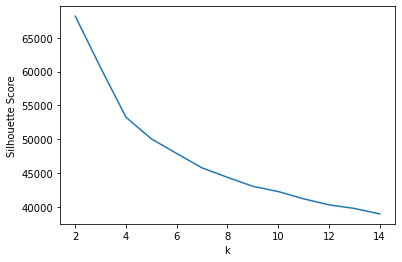

In [72]:
plt.plot(range(2,15),ssd)
plt.xlabel('k')
plt.ylabel('Silhouette Score')

#### There is a clear elbow when k=4, so we will use 4 as our number of clusters

In [73]:
Clusters = KMeans(n_clusters = 4, random_state = 3)
Clusters.fit(clustering_df)
anime_genre['Class'] = Clusters.labels_

In [74]:
anime_genre

,anime_id,name,type,episodes,rating,members,0,1,2,3,4,5,6,7,8,9,10,11,12,Class
0,32281,Kimi no Na wa,Movie,1,9.37,200630,Drama,Romance,School,Supernatural,None,None,None,None,None,None,None,None,None,1
1,5114,Fullmetal Alchemist Brotherhood,TV,64,9.26,793665,Action,Adventure,Drama,Fantasy,Magic,Military,Shounen,None,None,None,None,None,None,1
2,28977,Gintama,TV,51,9.25,114262,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None,2
3,9253,SteinsGate,TV,24,9.17,673572,Sci-Fi,Thriller,None,None,None,None,None,None,None,None,None,None,None,1
4,9969,Gintama039,TV,51,9.16,151266,Action,Comedy,Historical,Parody,Samurai,Sci-Fi,Shounen,None,None,None,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,9316,Toushindai My Lover Minami tai MechaMinami,OVA,1,4.15,211,Hentai,None,None,None,None,None,None,None,None,None,None,None,None,0
11826,5543,Under World,OVA,1,4.28,183,Hentai,None,None,None,None,None,None,None,None,None,None,None,None,0
11827,5621,Violence Gekiga David no Hoshi,OVA,4,4.88,219,Hentai,None,None,None,None,None,None,None,None,None,None,None,None,0
11828,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,OVA,1,4.98,175,Hentai,None,None,None,None,None,None,None,None,None,None,None,None,0


#### Visualize the Cluster

Text(0.5, 1.0, 'Clustering using K-Mean When k=4')

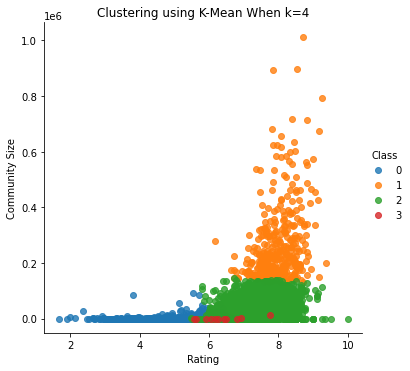

In [75]:
sns.lmplot(x = 'rating', y = 'members', data=anime_genre, hue='Class', fit_reg=False)
plt.ylabel('Community Size')
plt.xlabel('Rating')
plt.title('Clustering using K-Mean When k=4')

In [76]:
Class0 = anime_genre[anime_genre['Class']==0]

In [77]:
Class0.sort_values(by=['rating'],ascending=False)[['name','rating','Class']][0:5]

,name,rating,Class
10984,Gakuen 3,6.63,0
10987,Ryoujoku Hitozuma Onsen,6.63,0
10983,Bikyaku Seido Kaichou Ai,6.63,0
10992,Rennyuu Tales The Animation,6.62,0
10993,Rin x Sen Hakudaku Onna Kyoushi to Yaroudomo,6.62,0


In [78]:
Class1 = anime_genre[anime_genre['Class']==1]
Class1.sort_values(by=['rating'],ascending=False)[['name','rating','Class']][0:5]

,name,rating,Class
0,Kimi no Na wa,9.37,1
1,Fullmetal Alchemist Brotherhood,9.26,1
3,SteinsGate,9.17,1
4,Gintama039,9.16,1
6,Hunter x Hunter 2011,9.13,1


In [79]:
Class2 = anime_genre[anime_genre['Class']==2]
Class2.sort_values(by=['rating'],ascending=False)[['name','rating','Class']][0:5]

,name,rating,Class
10277,Taka no Tsume 8 Yoshidakun no XFiles,10.00,2
9446,Mogura no Motoro,9.50,2
8958,Kahei no Umi,9.33,2
2,Gintama,9.25,2
10589,Yakusoku Africa Mizu to Midori,9.25,2


In [80]:
Class3 = anime_genre[anime_genre['Class']==3]
Class3.sort_values(by=['rating'],ascending=False)[['name','rating','Class']][0:5]

,name,rating,Class
926,Doraemon 1979,7.76,3
3637,Ninja Hattorikun,6.92,3
9464,Monoshiri Daigaku Ashita no Calendar,6.80,3
5332,Manga Nippon Mukashibanashi 1976,6.48,3
9107,Kirin Ashita no Calendar,6.43,3


### popularity based filtering - User rating prediction

In [109]:
filtering_df = clustering_df.copy()

In [123]:
df_count = df.groupby(by = ['name'])['user_rating'].count().reset_index()[['name', 'user_rating']]
df_count.rename(columns = {'user_rating': 'totalRatingCount'},inplace=True)

In [124]:
anime_rating=df.merge(df_count, left_on = 'name', right_on = 'name', how = 'left')
anime_rating.head()

,anime_id,name,genre,type,episodes,average_rating,members,user_id,user_rating,totalRatingCount
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,2199
1,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,2199
2,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,2199
3,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,2199
4,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1,2199


In [125]:
anime_rating2=anime_rating.drop_duplicates(subset=['name'])

In [127]:
anime_rating2

,anime_id,name,genre,type,episodes,average_rating,members,user_id,user_rating,totalRatingCount
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5,2199
2199,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10,24574
26773,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,39,-1,6360
28159,9253,SteinsGate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9,19283
47442,9969,Gintama039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9,3673
...,...,...,...,...,...,...,...,...,...,...
7813583,9316,Toushindai My Lover Minami tai MechaMinami,Hentai,OVA,1,4.15,211,20171,7,4
7813587,5543,Under World,Hentai,OVA,1,4.28,183,39532,-1,4
7813591,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,27364,-1,3
7813594,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,OVA,1,4.98,175,27364,-1,4


### Popularity Based FIlter

In [129]:
rating1=anime_rating2[['anime_id','name','genre','average_rating','totalRatingCount']]
rating1.drop_duplicates(subset=['anime_id'],inplace=True)
rating1.reset_index(drop=True,inplace=True)

<ipython-input-129-4d7aee148656>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating1.drop_duplicates(subset=['anime_id'],inplace=True)


In [130]:
rating1

,anime_id,name,genre,average_rating,totalRatingCount
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",9.37,2199
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26,24574
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",9.25,6360
3,9253,SteinsGate,"Sci-Fi, Thriller",9.17,19283
4,9969,Gintama039,"Action, Comedy, Historical, Parody, Samurai, S...",9.16,3673
...,...,...,...,...,...
11130,9316,Toushindai My Lover Minami tai MechaMinami,Hentai,4.15,4
11131,5543,Under World,Hentai,4.28,4
11132,5621,Violence Gekiga David no Hoshi,Hentai,4.88,3
11133,6133,Violence Gekiga Shin David no Hoshi Inma Densetsu,Hentai,4.98,4


In [131]:
C = rating1['average_rating'].mean()
m = rating1['totalRatingCount'].quantile(0.85)
print('m: ', m, 'C: ', C)

m:  1040.0 C:  6.517838347552767


In [132]:
def Score (x, m=m, C=C):
    v = x['totalRatingCount']
    R = x['average_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [133]:
popular_anime =rating1.copy().loc[rating1['totalRatingCount'] >= m]

In [134]:
popular_anime['score'] = popular_anime.apply(Score, axis=1)

In [135]:
popular_anime = popular_anime.sort_values('score', ascending=False)
popular_anime[['name', 'score']].head(10)

,name,score
1,Fullmetal Alchemist Brotherhood,9.148661
3,SteinsGate,9.034279
10,Clannad After Story,8.920069
12,Code Geass Hangyaku no Lelouch R2,8.878717
2,Gintama,8.866021
6,Hunter x Hunter 2011,8.847457
14,Sen to Chihiro no Kamikakushi,8.825534
18,Code Geass Hangyaku no Lelouch,8.746380
15,Shigatsu wa Kimi no Uso,8.681799
21,Cowboy Bebop,8.675324


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


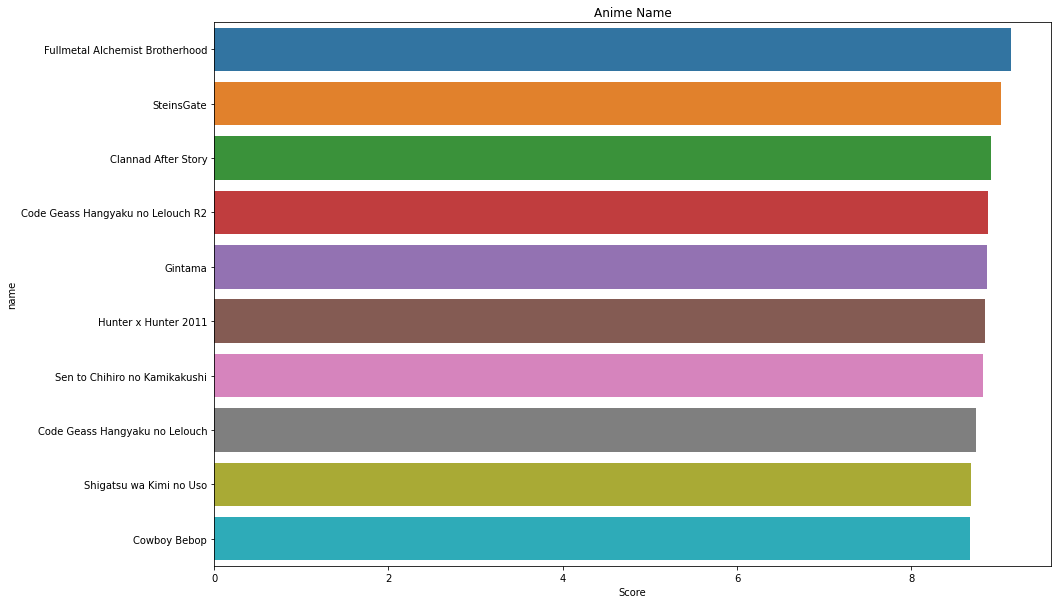

In [138]:
popular = popular_anime.head(10)
plt.figure(figsize=(15,10))
sns.barplot(popular['score'],popular['name'])
plt.title('Anime Name')
plt.xlabel('Score')
plt.show()